In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv("D:/OneDrive/文档/GitHub/Big-Data-2020Fall/lab2/bank.csv")
cols = df.columns.values
cols = [col.replace('\"','') for col in cols[0].split(';')]
print(cols)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [6]:
datas = []
for i in range(len(df)):
    s = df.iloc[i].values[0]
    datas.append([item.replace('\"','') for item in s.split(';')])
datas = np.array(datas)
print(datas)

[['30' 'unemployed' 'married' ... '0' 'unknown' 'no']
 ['33' 'services' 'married' ... '4' 'failure' 'no']
 ['35' 'management' 'single' ... '1' 'failure' 'no']
 ...
 ['57' 'technician' 'married' ... '0' 'unknown' 'no']
 ['28' 'blue-collar' 'married' ... '3' 'other' 'no']
 ['44' 'entrepreneur' 'single' ... '7' 'other' 'no']]


In [7]:
df_frame = {}
for i in range(len(cols)):
    df_frame[cols[i]] = datas[:,i]
df = pd.DataFrame(df_frame)
print(df)

     age            job  marital  education default balance housing loan  \
0     30     unemployed  married    primary      no    1787      no   no   
1     33       services  married  secondary      no    4789     yes  yes   
2     35     management   single   tertiary      no    1350     yes   no   
3     30     management  married   tertiary      no    1476     yes  yes   
4     59    blue-collar  married  secondary      no       0     yes   no   
...   ..            ...      ...        ...     ...     ...     ...  ...   
4516  33       services  married  secondary      no    -333     yes   no   
4517  57  self-employed  married   tertiary     yes   -3313     yes  yes   
4518  57     technician  married  secondary      no     295      no   no   
4519  28    blue-collar  married  secondary      no    1137      no   no   
4520  44   entrepreneur   single   tertiary      no    1136     yes  yes   

       contact day month duration campaign pdays previous poutcome   y  
0     cellular

In [8]:
df_frame = {}
for i in range(len(cols)):
    df_frame[cols[i]] = datas[:,i]
df = pd.DataFrame(df_frame)
print(df)

     age            job  marital  education default balance housing loan  \
0     30     unemployed  married    primary      no    1787      no   no   
1     33       services  married  secondary      no    4789     yes  yes   
2     35     management   single   tertiary      no    1350     yes   no   
3     30     management  married   tertiary      no    1476     yes  yes   
4     59    blue-collar  married  secondary      no       0     yes   no   
...   ..            ...      ...        ...     ...     ...     ...  ...   
4516  33       services  married  secondary      no    -333     yes   no   
4517  57  self-employed  married   tertiary     yes   -3313     yes  yes   
4518  57     technician  married  secondary      no     295      no   no   
4519  28    blue-collar  married  secondary      no    1137      no   no   
4520  44   entrepreneur   single   tertiary      no    1136     yes  yes   

       contact day month duration campaign pdays previous poutcome   y  
0     cellular

In [9]:
df[['age','balance','duration','campaign','pdays','previous']] = df[['age','balance','duration','campaign','pdays','previous']].astype(int)
df.dtypes

age           int32
job          object
marital      object
education    object
default      object
balance       int32
housing      object
loan         object
contact      object
day          object
month        object
duration      int32
campaign      int32
pdays         int32
previous      int32
poutcome     object
y            object
dtype: object

<AxesSubplot:>

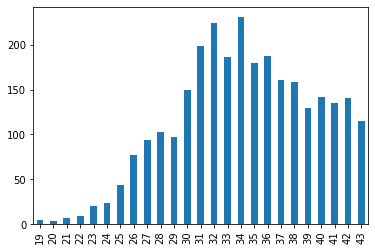

In [10]:
df['age'].value_counts().sort_index().head(25).plot.bar()

<AxesSubplot:>

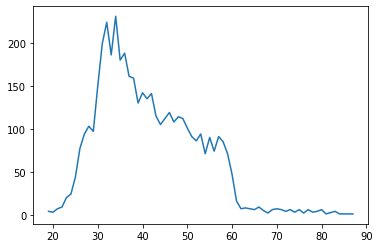

In [11]:
df['age'].value_counts().sort_index().plot.line()

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

In [13]:
df.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [14]:
class_mapping = {'no':0, 'yes':1}
df['default'] = df['default'].map(class_mapping)
df['housing'] = df['housing'].map(class_mapping)
df['loan'] = df['loan'].map(class_mapping)
df['y'] = df['y'].map(class_mapping)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [15]:
month_dict = {'oct':'10','may':'05','apr':'04','jun':'06','feb':'02','aug':'08','jan':'01','jul':'07','nov':'11','sep':'09','mar':'03','dec':'12'}
df['month'] = df['month'].map(month_dict)
df['date'] = '2019' + '-' + df['month'] + '-' +df['day']
df['date'] = pd.to_datetime(df['date'],format="%Y-%m-%d")
df['date'] = pd.to_datetime('2020-01-01',format="%Y-%m-%d") - df['date']
df['date'] = df['date'].dt.days
print(df['date'])

0        74
1       235
2       260
3       212
4       241
       ... 
4516    155
4517    237
4518    135
4519    329
4520    273
Name: date, Length: 4521, dtype: int64


In [16]:
del(df['day'])
del(df['month'])

In [17]:
jobs = df['job'].unique()
job_mapping = {jobs[i]:i for i in range(jobs.shape[0])}

maritals = df['marital'].unique()
marital_mapping = {maritals[i]:i for i in range(maritals.shape[0])}

educations = df['education'].unique()
education_mapping = {educations[i]:i for i in range(educations.shape[0])}

contacts = df['contact'].unique()
contact_mapping = {contacts[i]:i for i in range(contacts.shape[0])}

poutcomes = df['poutcome'].unique()
poutcome_mapping = {poutcomes[i]:i for i in range(poutcomes.shape[0])}

df['marital'] = df['marital'].map(marital_mapping)
df['job'] = df['job'].map(job_mapping)
df['education'] = df['education'].map(education_mapping)
df['contact'] = df['contact'].map(contact_mapping)
df['poutcome'] = df['poutcome'].map(poutcome_mapping)
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,date
0,30,0,0,0,0,1787,0,0,0,79,1,-1,0,0,0,74
1,33,1,0,1,0,4789,1,1,0,220,1,339,4,1,0,235
2,35,2,1,2,0,1350,1,0,0,185,1,330,1,1,0,260
3,30,2,0,2,0,1476,1,1,1,199,4,-1,0,0,0,212
4,59,3,0,1,0,0,1,0,1,226,1,-1,0,0,0,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,0,1,0,-333,1,0,0,329,5,-1,0,0,0,155
4517,57,4,0,2,1,-3313,1,1,1,153,1,-1,0,0,0,237
4518,57,5,0,1,0,295,0,0,0,151,11,-1,0,0,0,135
4519,28,3,0,1,0,1137,0,0,0,129,4,211,3,2,0,329


In [18]:
bins = [18,25,35,45,55,100] # 指定年龄的分界点
df['age'] = pd.cut(df['age'],bins,labels=False)
bins = [-np.inf,4137.1,11587.2,np.inf]
df['balance'] = pd.cut(df['balance'],bins, labels=False)
print(df[['age','balance']])

      age  balance
0       1        0
1       1        1
2       1        0
3       1        0
4       4        0
...   ...      ...
4516    1        0
4517    4        0
4518    4        0
4519    1        0
4520    2        0

[4521 rows x 2 columns]


In [19]:
cols = ['pdays','duration','campaign','date']
for col in cols:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
print(df[['pdays','duration','campaign','date']])

         pdays  duration  campaign      date
0     0.000000  0.024826  0.000000  0.203911
1     0.389908  0.071500  0.000000  0.653631
2     0.379587  0.059914  0.000000  0.723464
3     0.000000  0.064548  0.061224  0.589385
4     0.000000  0.073486  0.000000  0.670391
...        ...       ...       ...       ...
4516  0.000000  0.107580  0.081633  0.430168
4517  0.000000  0.049321  0.000000  0.659218
4518  0.000000  0.048659  0.204082  0.374302
4519  0.243119  0.041377  0.061224  0.916201
4520  0.286697  0.112877  0.020408  0.759777

[4521 rows x 4 columns]


In [20]:
df.to_csv("D:/OneDrive/文档/GitHub/Big-Data-2020Fall/lab2/after_bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,date
0,1,0,0,0,0,0,0,0,0,0.024826,0.000000,0.000000,0,0,0,0.203911
1,1,1,0,1,0,1,1,1,0,0.071500,0.000000,0.389908,4,1,0,0.653631
2,1,2,1,2,0,0,1,0,0,0.059914,0.000000,0.379587,1,1,0,0.723464
3,1,2,0,2,0,0,1,1,1,0.064548,0.061224,0.000000,0,0,0,0.589385
4,4,3,0,1,0,0,1,0,1,0.073486,0.000000,0.000000,0,0,0,0.670391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,1,1,0,1,0,0,1,0,0,0.107580,0.081633,0.000000,0,0,0,0.430168
4517,4,4,0,2,1,0,1,1,1,0.049321,0.000000,0.000000,0,0,0,0.659218
4518,4,5,0,1,0,0,0,0,0,0.048659,0.204082,0.000000,0,0,0,0.374302
4519,1,3,0,1,0,0,0,0,0,0.041377,0.061224,0.243119,3,2,0,0.916201


In [21]:
from sklearn.tree import DecisionTreeClassifier as DTC, export_graphviz
#读取数据
df = pd.read_csv("D:/OneDrive/文档/GitHub/Big-Data-2020Fall/lab2/after_bank.csv")
df = df.iloc[:,1:]
cols = list(df.columns.values)
cols.remove('y')
X = df[cols]
y = df[['y']]

In [22]:
#划分训练集与测试集
X_train = X[:4000]
y_train = y[:4000]
X_test = X[4000:5000]
y_test = y[4000:5000]

In [38]:
dtc = DTC(criterion='gini',max_depth=5,min_samples_leaf=1) #基于基尼系数
dtc.fit(X_train,y_train)
print('准确率',dtc.score(X_test,y_test))

准确率 0.9001919385796545


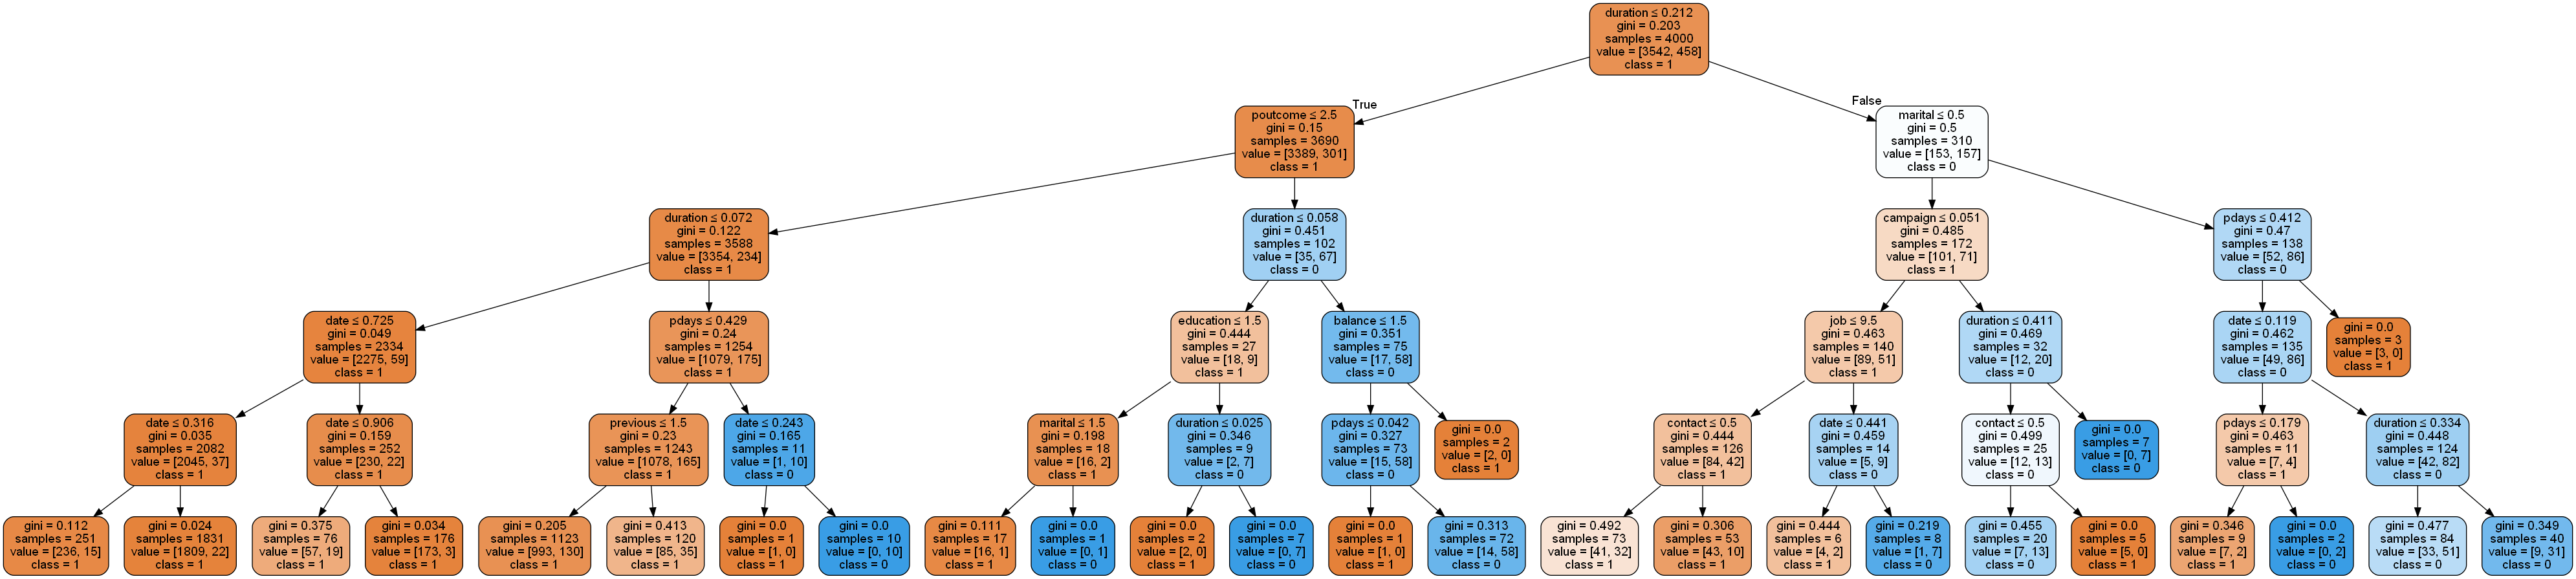

In [39]:
from IPython.display import Image
from sklearn import tree
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin'
dot_data = tree.export_graphviz(dtc,out_file=None,
                               feature_names=X_train.columns,
                               class_names=['1','0'],
                               filled=True,
                               rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("D:/OneDrive/文档/GitHub/Big-Data-2020Fall/lab2/result.gif")

Image(graph.create_png())